In [2]:
# Prática de Regressão Linear Simples

In [31]:
# import de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning
from yellowbrick.regressor import ResidualsPlot

/home/alison/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
# Carregar base de dados
base = pd.read_csv('./dados/cars.csv')
base.shape

(50, 3)

In [33]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [34]:
# Exclusão da primeira coluna
# Axis = 1, quer dizer que se trata do eixo da coluna
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [35]:
# Definição das variáveis X e Y, X distância é a variável independente e Y velocidade é a variável dependente
x = base.iloc[:, 1].values
y = base.iloc[:, 0].values
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [36]:
# Cálculo da correlação entre x e y
correlacao = np.corrcoef(x, y)
# correlacao = 0.806, forte, alta e positiva
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [37]:
# Tratamento de dados
# formato de matriz, com uma coluna a mais
x = x.reshape(-1, 1)
x

array([[  2],
       [ 10],
       [  4],
       [ 22],
       [ 16],
       [ 10],
       [ 18],
       [ 26],
       [ 34],
       [ 17],
       [ 28],
       [ 14],
       [ 20],
       [ 24],
       [ 28],
       [ 26],
       [ 34],
       [ 34],
       [ 46],
       [ 26],
       [ 36],
       [ 60],
       [ 80],
       [ 20],
       [ 26],
       [ 54],
       [ 32],
       [ 40],
       [ 32],
       [ 40],
       [ 50],
       [ 42],
       [ 56],
       [ 76],
       [ 84],
       [ 36],
       [ 46],
       [ 68],
       [ 32],
       [ 48],
       [ 52],
       [ 56],
       [ 64],
       [ 66],
       [ 54],
       [ 70],
       [ 92],
       [ 93],
       [120],
       [ 85]])

In [38]:
# Criar modelo e indicar que treinamento deve ser executado(fit)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [39]:
# Visualização dos coeficientes
# Interceptação
modelo.intercept_

8.283905641787172

In [40]:
# Visualização dos coeficientes
# Inclinação
modelo.coef_

array([0.16556757])

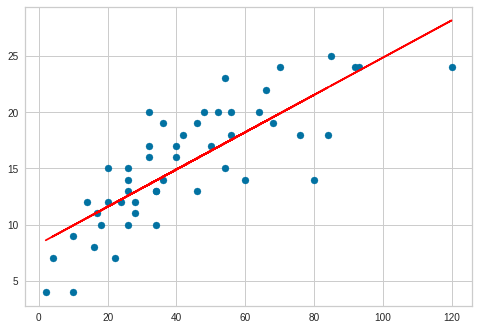

In [41]:
# Geração do gráfico de dispersão
plt.scatter(x, y)
# Geração do gráfico de dispersão com os pontos reais e as previsões
# Criando uma linha de melhor ajuste
plt.plot(x, modelo.predict(x), color = 'red')

In [42]:
# Previsão da distância 22 pés, usando a fórmula manual
# interceptação * inclinação * valor da distancia
# Qual velocidade precisou de 22 pés para parar?
velocidade = modelo.intercept_ + modelo.coef_ * 22
velocidade

array([11.92639228])

In [43]:
# Previsão utilizando a função do sklearn
modelo.predict([[22]])

array([11.92639228])

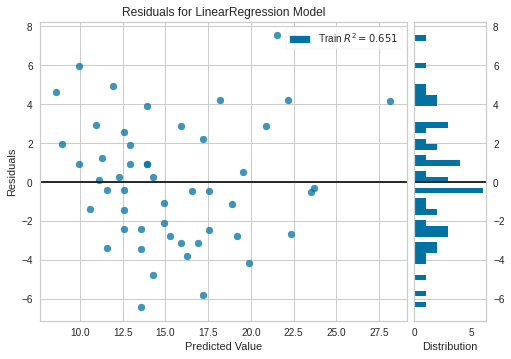

In [44]:
# Gráfico para visualizar os residuais do modelo
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()